In [1]:
import smallcode as sc
import xarray as xr

In [2]:
temp = sc.read_data('../data/cds_monthly_t2m_ssr_1940-present.nc', timespan=("2000-01","2023-07"), expver=1)
display(temp)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 283)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 1
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2023-07-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    ssr        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-28 10:41:01 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
sc.kelvin_to_celsius(temp, 't2m')

In [4]:
temp

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 283)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 1
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2023-07-01
Data variables:
    t2m        (time, latitude, longitude) float32 -23.63 -23.63 ... nan nan
    ssr        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-28 10:41:01 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
temp=sc.center_longitude0(temp)

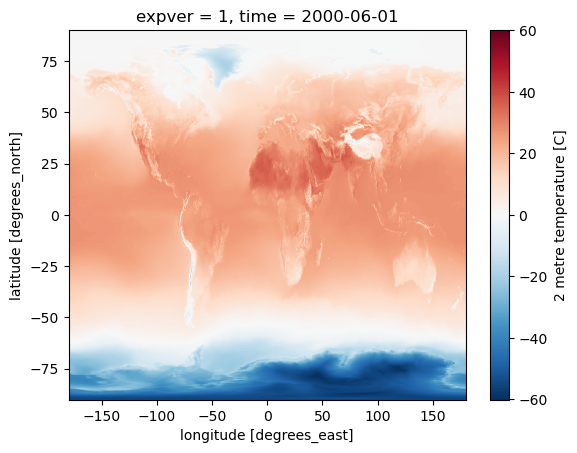

In [8]:
temp.t2m.sel(time="2000-06").plot()

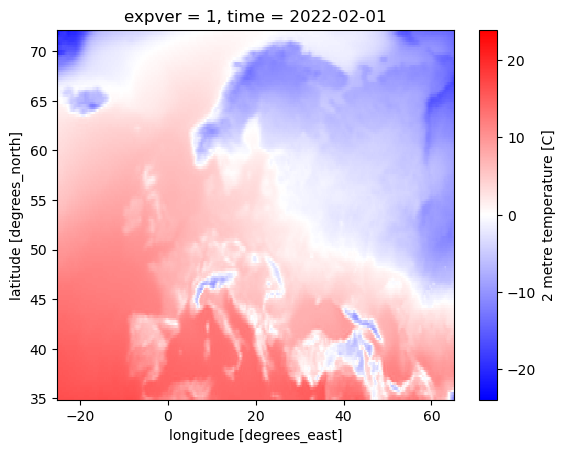

In [9]:
# map the european area
temp_europe = sc.filter_space(temp, 35., 72., -25., 65.)
temp_europe.t2m.sel(time='2022-02').plot(cmap='bwr')
